Data preprocessing

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


CNN

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Functional API equivalent
input_layer = Input(shape=(28, 28, 1), name='input')
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten(name='flatten')(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)

cnn_model = Model(inputs=input_layer, outputs=output_layer)
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

cnn_model.save("cnn_model.keras")  # Save in newer format


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.7341 - loss: 0.7373 - val_accuracy: 0.8692 - val_loss: 0.3702
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 68ms/step - accuracy: 0.8723 - loss: 0.3527 - val_accuracy: 0.8821 - val_loss: 0.3227
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.8948 - loss: 0.2889 - val_accuracy: 0.8921 - val_loss: 0.2943
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.9062 - loss: 0.2559 - val_accuracy: 0.8973 - val_loss: 0.2854
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - accuracy: 0.9148 - loss: 0.2293 - val_accuracy: 0.9079 - val_loss: 0.2546
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.9255 - loss: 0.2046 - val_accuracy: 0.9033 - val_loss: 0.2701
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step - accuracy: 0.9311 - loss: 0.1874 - val_accuracy: 0.9079 - val_loss: 0.2536
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 61ms/step - accuracy: 0.9406 - loss: 0.1649 - 

EDA

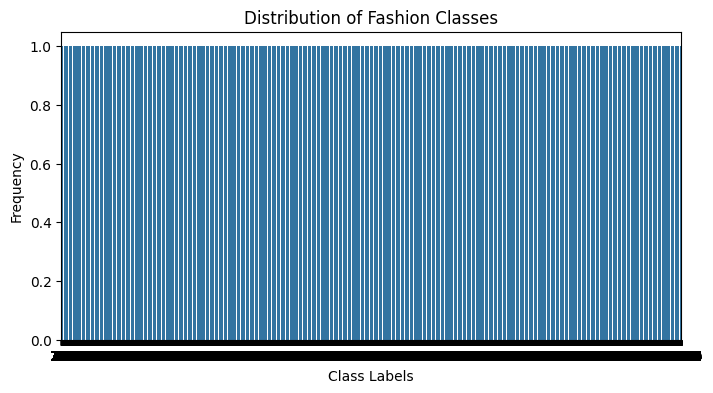

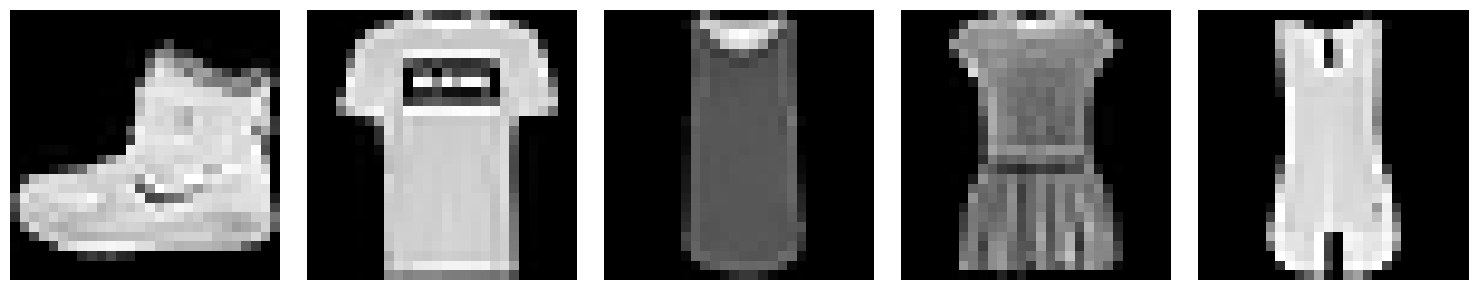

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.countplot(y_train)
plt.title('Distribution of Fashion Classes')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(15,3))
for i in range(5):
    axes[i].imshow(x_train[i].reshape(28,28), cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

ARIMA

In [7]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import os


# Synthetic time-series data example
data = pd.Series([120, 135, 145, 160, 150, 160, 155, 165, 170, 180])

model_arima = ARIMA(data, order=(2,1,2)).fit()

forecast = model_arima.forecast(steps=10)
forecast.to_csv("arima_forecast.csv")

# --- CONFIRMATION ---
print("Saved files:", os.listdir())
print(model_arima.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Saved files: ['.config', 'cnn_model.h5', 'arima_forecast.csv', 'sample_data']
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -31.486
Date:                Mon, 05 May 2025   AIC                             72.973
Time:                        01:47:39   BIC                             73.959
Sample:                             0   HQIC                            70.845
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1452      0.792      0.183      0.855      -1.408       1.698
ar.L2          0.2901      1.050      0.276      0.78

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Recommendation Systems (Content-Based via Cosine Similarity)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


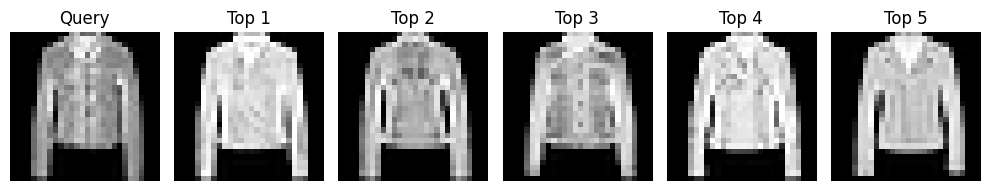

In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import joblib


# Now create feature extractor
feature_model = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer('flatten').output)

# Extract embeddings
image_embeddings = feature_model.predict(x_test)


joblib.dump(image_embeddings, "image_embeddings.pkl")
joblib.dump(x_test, "x_test_images.pkl")
joblib.dump(y_test, "y_test_labels.pkl")
# Cosine similarity between test images
similarity_matrix = cosine_similarity(image_embeddings.astype("float32"))


# Visualize recommendations
def show_recommendations(query_index, top_n=5):
    import matplotlib.pyplot as plt
    similar_indices = similarity_matrix[query_index].argsort()[::-1][1:top_n+1]
    plt.figure(figsize=(10, 2))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(x_test[query_index].reshape(28, 28), cmap='gray')
    plt.title("Query")
    plt.axis('off')
    for i, idx in enumerate(similar_indices):
        plt.subplot(1, top_n + 1, i + 2)
        plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f"Top {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
show_recommendations(10)


Sentiment Analysis

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Sample reviews
reviews = [
    "Love the fabric and style!", "Too small and poor quality.",
    "Trendy and affordable.", "Didn't like the color.", "Perfect for any occasion!"
]
labels = [1, 0, 1, 0, 1]  # 1 = positive, 0 = negative

# Train model
sentiment_model = make_pipeline(CountVectorizer(), MultinomialNB())
sentiment_model.fit(reviews, labels)

joblib.dump(sentiment_model, "sentiment_model.pkl")

# Predict new sentiment
test_review = "This dress looks good but feels cheap"
print("Sentiment:", "Positive" if sentiment_model.predict([test_review])[0] else "Negative")


Sentiment: Positive


Inventory Forecasting for Sustainability

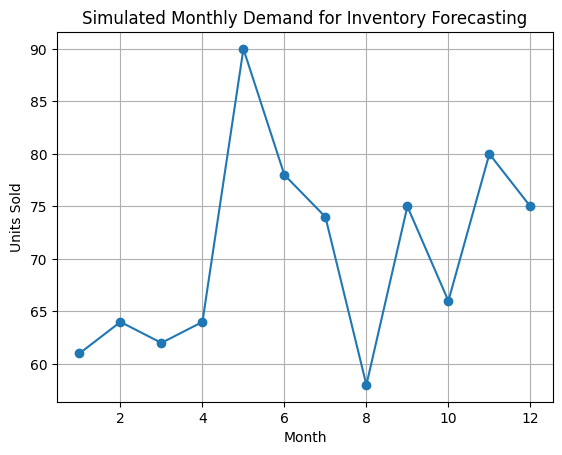

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated demand trend
np.random.seed(0)
demand = np.random.poisson(lam=[60 + i*2 for i in range(12)], size=12)

plt.plot(range(1, 13), demand, marker='o')
plt.title("Simulated Monthly Demand for Inventory Forecasting")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()
